# TRIP & TRAVEL CUSTOMER RECOMMENDATIONS MODEL

![App Platorm](https://holidayturn.com/wp-content/uploads/2017/09/International-travel.jpg)

## Problem Given:
"Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

## Dataset Feature Descriptions:
* `CustomerID`               : Unique customer ID
* `ProdTaken`                : Whether or not the customer bought a product
* `Age`                      : Customer age
* `TypeofContact`            : How was the customer contacted
* `CityTier`                 : City tier depends on the development of a city, population, facilities, and living standards
* `DurationOfPitch`          : Duration of the pitch by a salesperson to the customer
* `Occupation`               : Occupation of customer
* `Gender`                   : Gender of customer
* `NumberOfPersonVisiting`   : Total number of persons planning to take the trip with the customer
* `NumberOfFollowups`        : Total number of follow-ups has been done by the salesperson after the sales pitch
* `ProductPitched`           : Product pitched by the salesperson
* `PreferredPropertyStar`    : Preferred hotel property rating by customer
* `MaritalStatus`            : Marital status of customer
* `NumberOfTrips`            : Average number of trips in a year by customer
* `Passport`                 : If customer has passport or not
* `PitchSatisfactionScore`   : Sales pitch satisfaction score
* `OwnCar`                   : Does the customer own a car
* `NumberOfChildrenVisiting` : Number of children traveling with the customer
* `Designation`              : Designation of the customer in the current organization
* `MonthlyIncome`            : Gross monthly income of the customer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load & Describe Data

## Load Data

In [ ]:
url = 'https://raw.githubusercontent.com/sulthonamar/DataPreprocessing/main/Travel.csv'
df = pd.read_csv(url)

In [ ]:
df.sample(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4546,204546,0,43.0,Company Invited,1,9.0,Small Business,Male,3,4.0,Basic,3.0,Single,7.0,1,1,1,2.0,Executive,21193.0
2399,202399,1,NaN,Company Invited,3,19.0,Large Business,Female,2,3.0,Deluxe,4.0,Single,6.0,0,3,1,0.0,Manager,NaN
3238,203238,0,35.0,Company Invited,1,10.0,Salaried,Male,3,4.0,Deluxe,3.0,Unmarried,2.0,0,2,1,1.0,Manager,26434.0
2985,202985,0,37.0,Company Invited,1,15.0,Salaried,Female,4,3.0,Standard,5.0,Divorced,2.0,0,3,0,1.0,Senior Manager,30391.0
2220,202220,0,44.0,Self Enquiry,3,34.0,Small Business,Female,2,1.0,Super Deluxe,3.0,Married,4.0,1,1,1,0.0,AVP,28320.0


## Describe Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Dari fungsi `.info()` diketahui:
- Terdapat 20 Fitur atau kolom dengan 4888 baris data
- Beberapa table memiliki ***Missing Value*** diantaranya: `Age`, `TypeofContact`, `DurationOfPitch`, `NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips`, `NumberOfChildrenVisiting`, dan `MonthlyIncome`
- Tipe data pada beberapa fitur belum merepresentasikan nilai dari fitur tersebut, seperti: `CityTier` yang merupakan data kategorik namun sudah direpresentasikan menggunakan angka (***int***)

# Exploratory Data Analysis

## Pendekatan Numerik

Data dipisahkan menjadi 4 kelompok yaitu:
- Data Numerik - Continous
- Data Numerik - Diskrit
- Data Kategorik - Ordinal
- Data Kategotrik - Nominal

In [ ]:
dnum_col = [
    'NumberOfPersonVisiting',
    'NumberOfFollowups',
    'NumberOfTrips',
    'PitchSatisfactionScore',
    'NumberOfChildrenVisiting',
]

#continuous numerical columns
cnum_col = [
    'Age',
    'DurationOfPitch',
    'MonthlyIncome'
]

#list of categorical columns
ncat_col = [
    'CustomerID',
    'Occupation',
    'Gender',
    'TypeofContact',
    'MaritalStatus',
    'Passport',
    'OwnCar'
]

ocat_col = [
    'ProductPitched',
    'CityTier',
    'PreferredPropertyStar',
    'Designation'
]

#target column
target_col = ['ProdTaken']

In [ ]:
nums = dnum_col + cnum_col
cats = ncat_col + ocat_col

#### Deskripsi Statistik Fitur Numerik

In [ ]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.0,1.0,2.0,3.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


In [ ]:
df['NumberOfPersonVisiting'].unique()

array([3, 2, 1, 4, 5])

#### Deksripsi Statistik Fitur Kategori

In [ ]:
df_cat = df[cats].astype('str')
df_cat.describe().T

,count,unique,top,freq
CustomerID,4888,4888,200000,1
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
TypeofContact,4888,3,Self Enquiry,3444
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466
OwnCar,4888,2,1,3032
ProductPitched,4888,5,Basic,1842
CityTier,4888,3,1,3190
PreferredPropertyStar,4888,4,3.0,2993


In [ ]:
for i in df[cats].columns:
    x = df[i].unique()
    print(f'{i}: {x}')
    print()

CustomerID: [200000 200001 200002 ... 204885 204886 204887]

Occupation: ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']

Gender: ['Female' 'Male' 'Fe Male']

TypeofContact: ['Self Enquiry' 'Company Invited' nan]

MaritalStatus: ['Single' 'Divorced' 'Married' 'Unmarried']

Passport: [1 0]

OwnCar: [1 0]

ProductPitched: ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']

CityTier: [3 1 2]

PreferredPropertyStar: [ 3.  4.  5. nan]

Designation: ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']



**Fitur Numerik**
- Semua Fitur Numerik yang bernilai ***Continous*** (`Age`, `DurationOfPitch`, `MonthlyIncome`) memiliki nilai **mean** yang lebih besar dari **median** sehingga ada indikasi data ***Skew***
- Semua fitur numerik yang bernilai ***Diskrit*** memiliki nilai **mean** yang lebih kecil dari **median** sehingga ada indikasi data ***Skew***

**Fitur Kategorik**
- Fitur `CustomerID` merupakan fitur **identifier** pada dataset sehingga semua nilainya ***unique***, dan diputuskan untuk ***Drop***
- Tidak perlu ada fitur lain yang dibuang atau didrop untuk fitur kategorik, karena nilai unik dari masing-masing kolom masih dalam batas wajar
- Dilihat dari nilai unique masing-masing fitur terdapat beberapa nilai yang janggal, diantaranya:

1. Fitur `Gender` memiliki nilai `['Female' 'Male' 'Fe Male']` sehingga nilai `Fe Male` dapat dikonversi menjadi `Female`
2. Fitur `MaritalStatus` memiliki nilai `['Single' 'Divorced' 'Married' 'Unmarried']` dimana `Unmarried` sama artinya dengan `Single`, sehingga bisa dikonversi ke salah satu nilai saja

Menghapus Kolom `CustomerID`

In [ ]:
df.drop(columns = 'CustomerID', inplace=True)
ncat_col.remove('CustomerID')
nums = dnum_col + cnum_col
cats = ncat_col + ocat_col

Mengubah nilai `Fe Male` menjadi `Female`

In [ ]:
df.replace('Fe Male','Female', inplace = True)

Mengubah nilai `Single` menjadi `Unmarried`

In [ ]:
df.replace('Single', 'Unmarried', inplace = True)

## Pendekatan Grafis

### Univariate Analysis

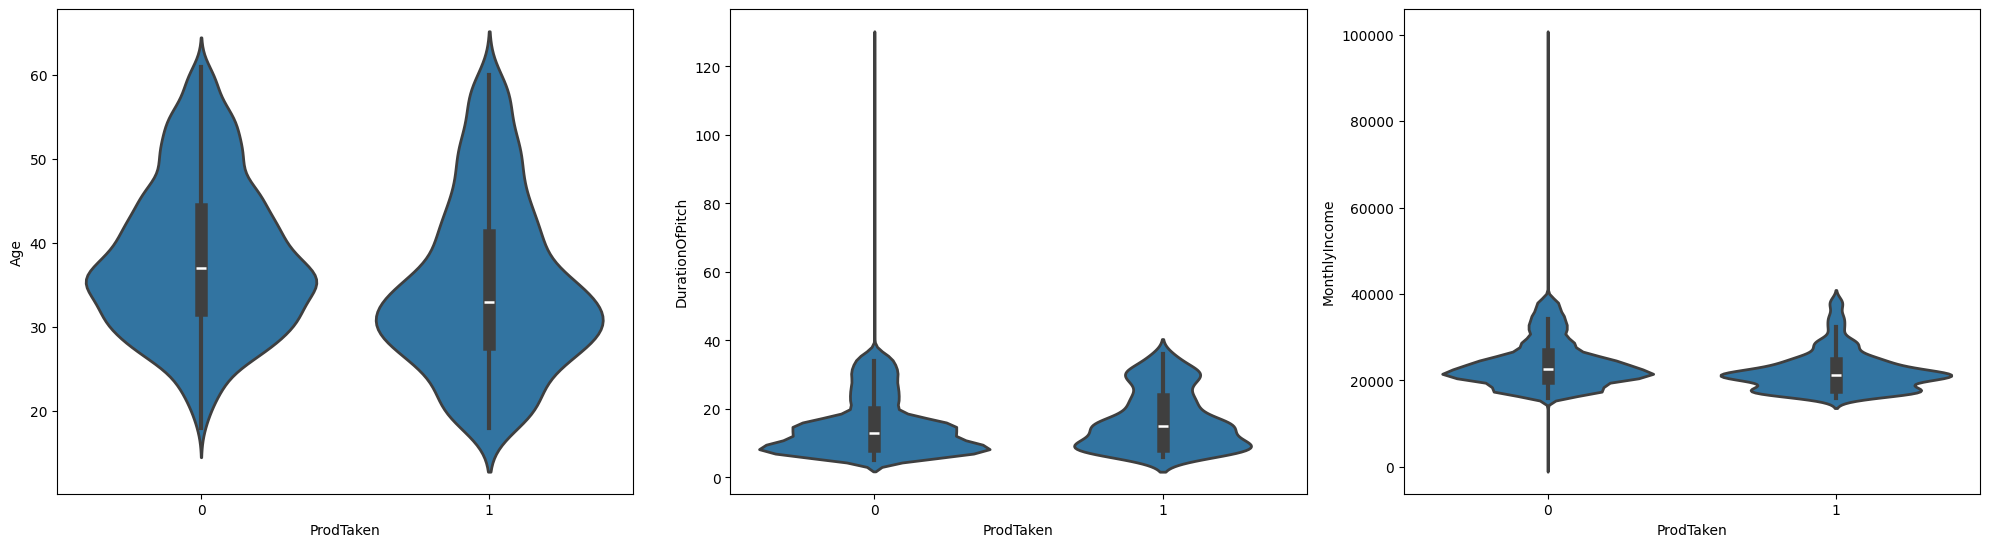

In [ ]:
plt.figure(figsize=(20,16))
for i in range(0, len(cnum_col)):
    plt.subplot(3, 3, i+1)
    sns.violinplot(data=df, x='ProdTaken', y=cnum_col[i], orient='v', linewidth=2)
    plt.tight_layout()

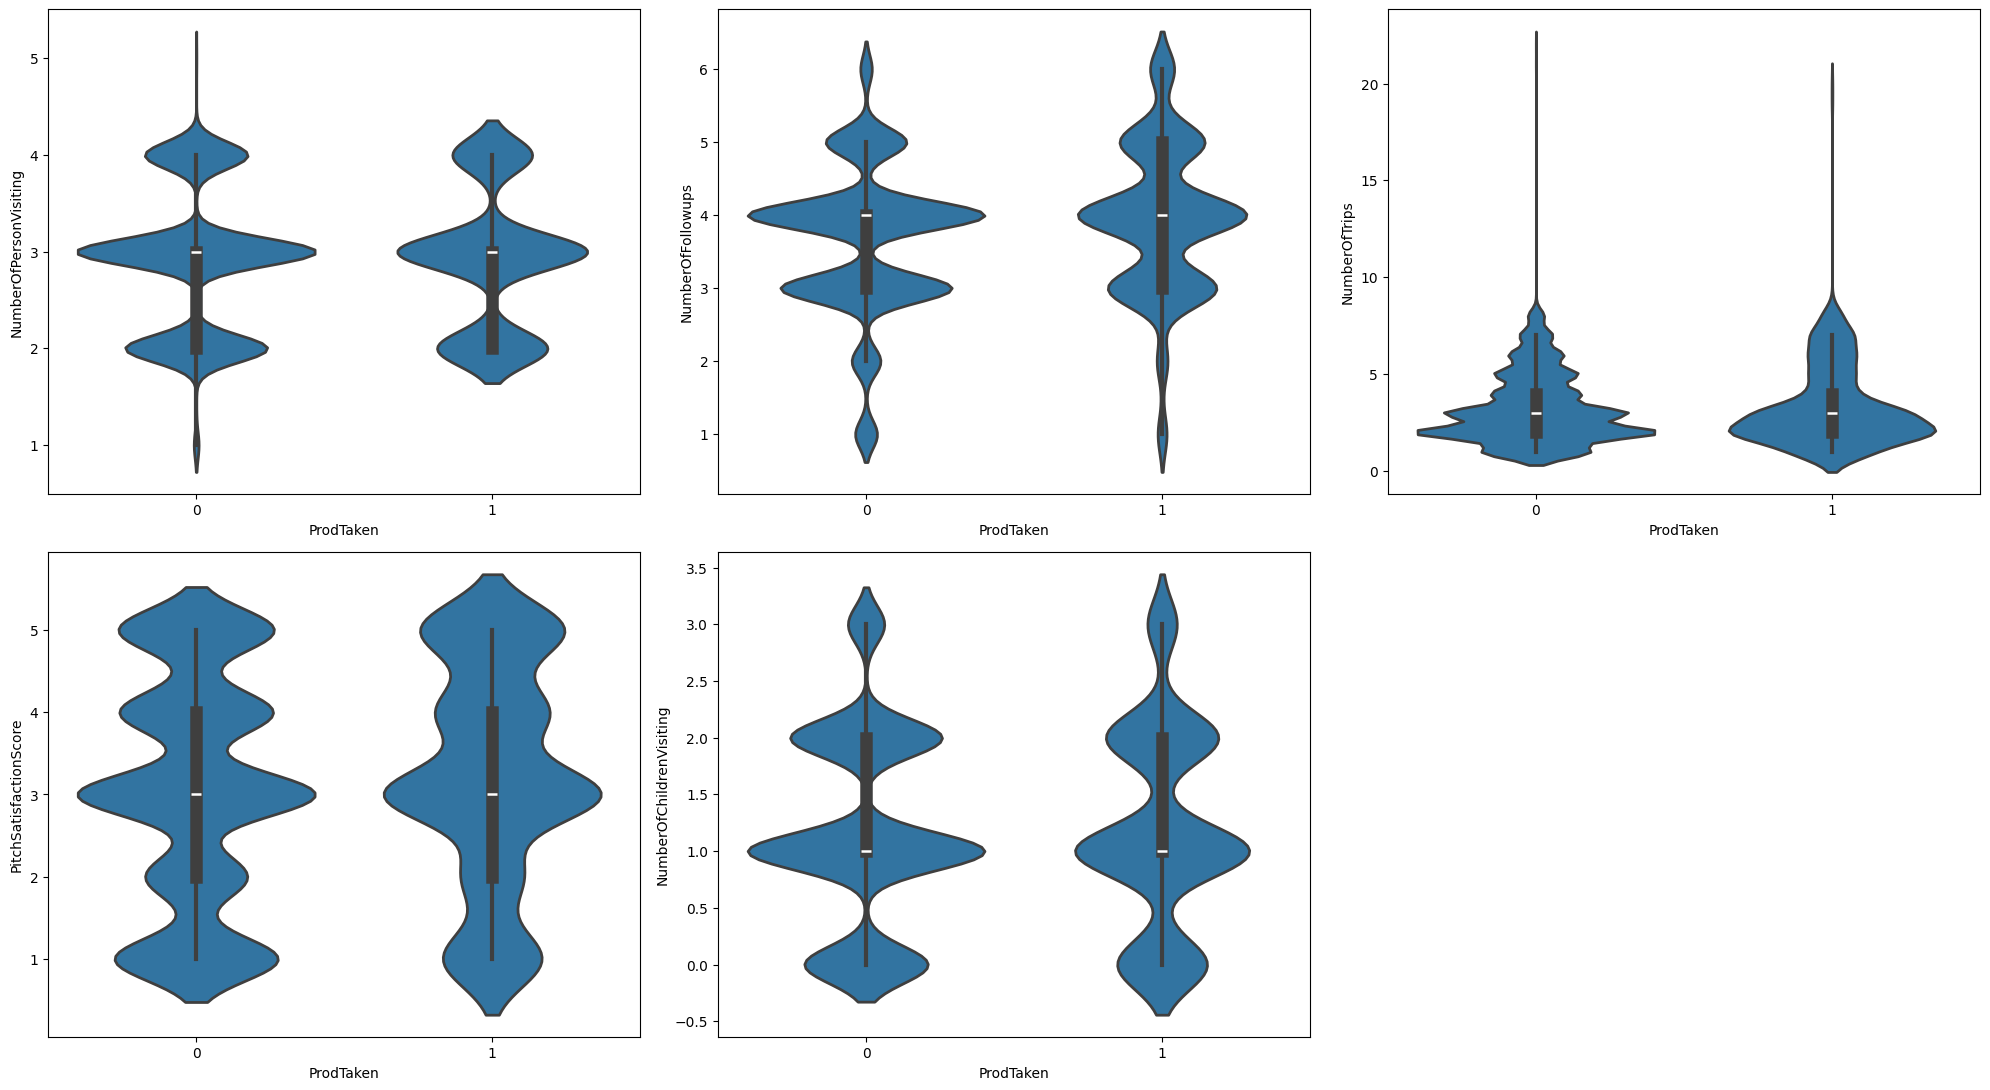

In [ ]:
plt.figure(figsize=(20,16))
for i in range(0, len(dnum_col)):
    plt.subplot(3, 3, i+1)
    sns.violinplot(data=df, x='ProdTaken', y=dnum_col[i], orient='v', linewidth=2)
    plt.tight_layout()

### Multivariate Analysis

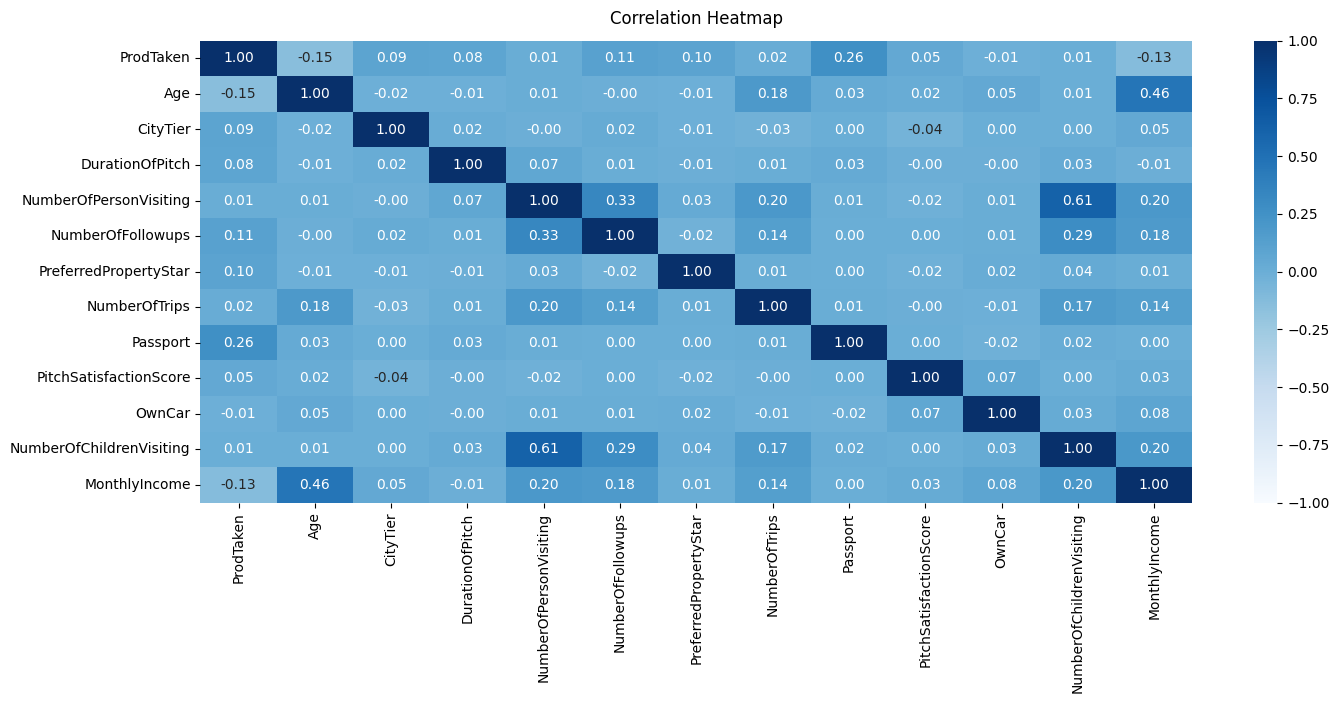

In [ ]:
# Memilih hanya kolom numerik
numeric_df = df.select_dtypes(include=['number'])

# Menghitung korelasi
corr_matrix = numeric_df.corr()

# Membuat heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='Blues', fmt='.2f')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

# Data Preparation

##  1. Data Cleansing

### A. Handling Missing Value

In [ ]:
#check null value
df.isna().sum()

,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45
ProductPitched,0


In [ ]:
#mengisi nilai null
df.fillna(
    value = {
        'Age' : df.Age.mode()[0],
        'TypeofContact' : df.TypeofContact.mode()[0],
        'DurationOfPitch' : df.DurationOfPitch.mean(),
        'NumberOfFollowups' : df.NumberOfFollowups.median(),
        'PreferredPropertyStar' : df.PreferredPropertyStar.median(),
        'NumberOfTrips' : df.NumberOfTrips.median(),
        'NumberOfChildrenVisiting' : df.NumberOfChildrenVisiting.median(),
        'MonthlyIncome' : df.MonthlyIncome.mean()
    }, inplace=True)

df.isnull().sum()

,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0
ProductPitched,0


### B. Handling Duplicated Data

In [ ]:
df.duplicated().sum()

141

In [ ]:
print('The shape of data before removing duplicate')
print(df.shape)

df = df.drop_duplicates()
print('The shape of data after removing duplicate')
print(df.shape)

The shape of data before removing duplicate
(4888, 19)
The shape of data after removing duplicate
(4747, 19)


### C. Handling Ouliers

In [ ]:
outliers = ['DurationOfPitch', 'MonthlyIncome', 'NumberOfTrips']

In [ ]:
#log transformation
for num in outliers:
    df[num] = np.log(df[num] + (df[df[num] > 0][num].min() / 2))

<ipython-input-22-ac1ae4932c0a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num] = np.log(df[num] + (df[df[num] > 0][num].min() / 2))


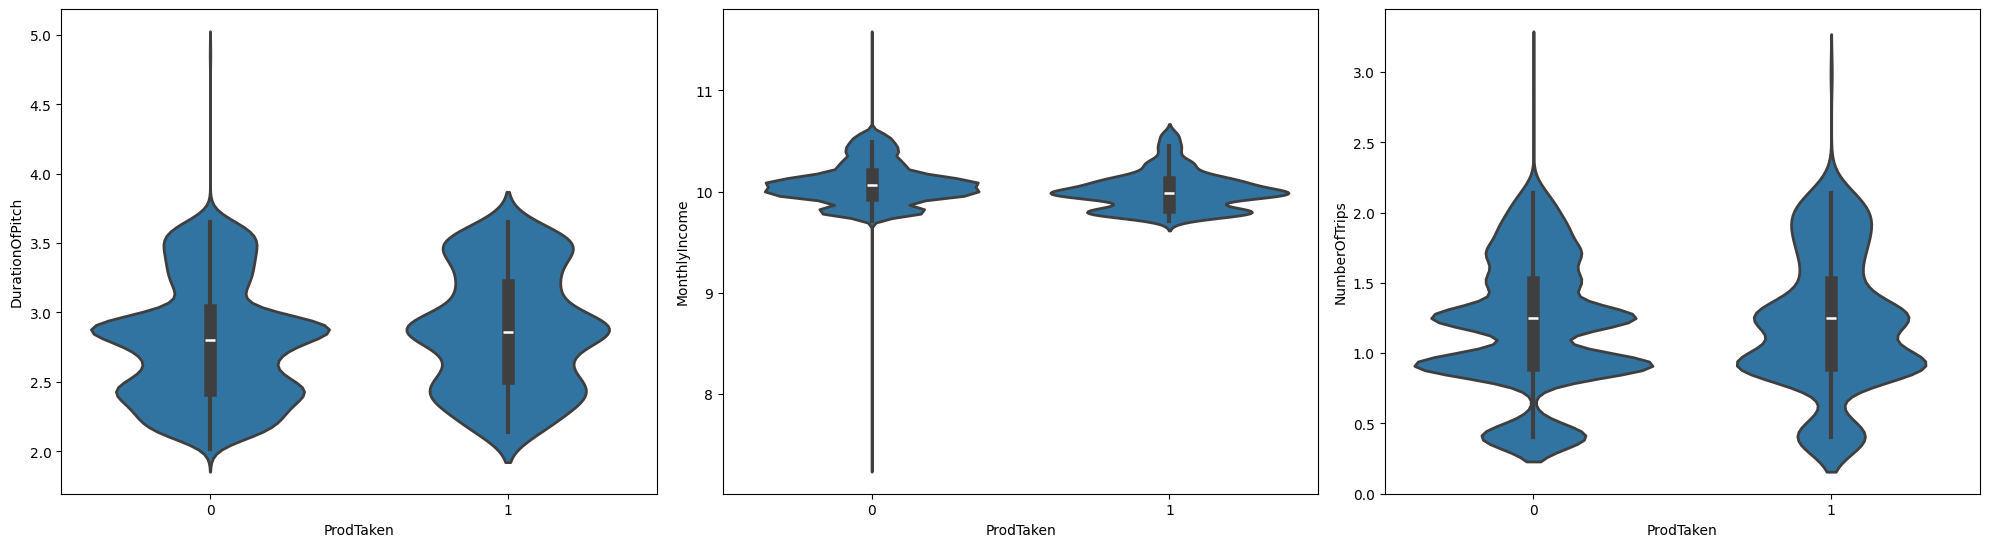

In [ ]:
plt.figure(figsize=(20,16))
for i in range(0, len(outliers)):
    plt.subplot(3, 3, i+1)
    sns.violinplot(data=df, x='ProdTaken', y=outliers[i], orient='v', linewidth=2)
    plt.tight_layout()

In [ ]:
#handling outlier dengan z-score
from scipy import stats
print(f'Jumlah data sebelum drop outlier: {len(df)}')

for i in outliers:
        z_scores = np.abs(stats.zscore(df[i]))
        df = df[z_scores <= 3]

print(f'Jumlah data setelah drop oulier: {len(df)}')

Jumlah data sebelum drop outlier: 4747
Jumlah data setelah drop oulier: 4737


### D. Feature Transformation

In [ ]:
from sklearn.preprocessing import StandardScaler

for i in nums:
    df[i] = StandardScaler().fit_transform(df[i].values.reshape(len(df), 1))

In [ ]:
df[nums].describe()

,NumberOfPersonVisiting,NumberOfFollowups,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisiting,Age,DurationOfPitch,MonthlyIncome
count,4.737000e+03,4.737000e+03,4.737000e+03,4.737000e+03,4.737000e+03,4.737000e+03,4.737000e+03,4.737000e+03
mean,9.599902e-17,4.799951e-17,-7.199926e-17,-1.319987e-16,-1.919980e-16,1.589984e-16,3.899960e-16,-2.087979e-15
std,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00
min,-2.640897e+00,-2.694599e+00,-1.721374e+00,-1.498821e+00,-1.393160e+00,-2.131191e+00,-1.851716e+00,-1.828233e+00
25%,-1.259805e+00,-7.043729e-01,-6.210007e-01,-7.684523e-01,-2.240902e-01,-7.080012e-01,-8.398729e-01,-6.030150e-01
50%,1.212865e-01,2.907403e-01,1.037965e-01,-3.808341e-02,-2.240902e-01,-1.606205e-01,1.471586e-02,-1.022960e-01
75%,1.212865e-01,2.907403e-01,6.451547e-01,6.922855e-01,9.449795e-01,6.057126e-01,6.412946e-01,4.707128e-01
max,2.883470e+00,2.280967e+00,2.015143e+00,1.422654e+00,2.114049e+00,2.576283e+00,2.020435e+00,2.587922e+00


### E. Feature Encoding

In [ ]:
df_cat = df[cats].astype('str')
df_cat.describe().T

,count,unique,top,freq
Occupation,4737,4,Salaried,2287
Gender,4737,2,Male,2829
TypeofContact,4737,2,Self Enquiry,3371
MaritalStatus,4737,3,Married,2277
Passport,4737,2,0,3368
OwnCar,4737,2,1,2924
ProductPitched,4737,5,Basic,1794
CityTier,4737,3,1,3090
PreferredPropertyStar,4737,3,3.0,2924
Designation,4737,5,Executive,1794


- Fitur `ProductPitched`, `CityTier`, `PreferredPropertyStar`, `Designation` merupakan nilai kategorik yang memiliki urutan dan akan dilakukan **encoding**, selain fitur-fitur ini nilainya bersifat **Nominal** atau tidak memiliki urutan.
- Fitur `Occupation`, dan `MaritalStatus` merupkan fitur kategorik nomial yang memiliki nilai unik lebih dari 2, namun pada project ini akan dilakukan **encoding** pada kedua fitur dan tidak dilakukan **one hot encoding** sama dengan fitur kategorik nominal yang lain (yang hanya memiliki 2 nilai unik)
- Semua fitur kategorik setelah dilakukan **encoding** akan diubah tipe datanya menjadi numerik dan dilakukan standarisasi pada nilai yang telah diencoding

In [ ]:
occupation_mapping = {'Salaried' : 0,
                      'Free Lancer': 1,
                      'Small Business': 2,
                      'Large Business': 3
}

gender_mapping = {'Female': 0,
                  'Male': 1
}

typeofContact_mapping = {'Self Enquiry': 0,
                        'Company Invited': 1
}

maritalStatus_mapping = {'Unmarried': 0,
                          'Divorced': 1,
                          'Married': 2
}

productPitched_mapping = {'Deluxe': 0,
                          'Basic': 1,
                          'Standard':2,
                          'Super Deluxe':3,
                          'King': 4
}

designation_mapping = {'Manager': 0,
                       'Executive': 1,
                       'Senior Manager':2,
                       'AVP':3,
                       'VP': 4}

In [ ]:
df['Occupation']= df['Occupation'].map(occupation_mapping)
df['Gender'] = df['Gender'].map(gender_mapping)
df['TypeofContact'] = df['TypeofContact'].map(typeofContact_mapping)
df['MaritalStatus'] = df['MaritalStatus'].map(maritalStatus_mapping)
df['ProductPitched'] = df['ProductPitched'].map(productPitched_mapping)
df['Designation'] = df['Designation'].map(designation_mapping)

In [ ]:
df[cats].sample(5)

,Occupation,Gender,TypeofContact,MaritalStatus,Passport,OwnCar,ProductPitched,CityTier,PreferredPropertyStar,Designation
897,0,0,0,0,0,0,0,3,3.0,0
180,2,0,0,1,1,1,1,1,3.0,1
3103,2,1,0,0,0,1,0,3,3.0,0
2256,0,1,1,2,0,1,1,1,3.0,1
677,0,0,0,1,0,0,2,1,4.0,2


In [ ]:
df[cats] = df[cats].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4737 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4737 non-null   int64  
 1   Age                       4737 non-null   float64
 2   TypeofContact             4737 non-null   int64  
 3   CityTier                  4737 non-null   int64  
 4   DurationOfPitch           4737 non-null   float64
 5   Occupation                4737 non-null   int64  
 6   Gender                    4737 non-null   int64  
 7   NumberOfPersonVisiting    4737 non-null   float64
 8   NumberOfFollowups         4737 non-null   float64
 9   ProductPitched            4737 non-null   int64  
 10  PreferredPropertyStar     4737 non-null   int64  
 11  MaritalStatus             4737 non-null   int64  
 12  NumberOfTrips             4737 non-null   float64
 13  Passport                  4737 non-null   int64  
 14  PitchSatisfac

In [ ]:
for i in cats:
    df[i] = StandardScaler().fit_transform(df[i].values.reshape(len(df), 1))

In [ ]:
df[cats].describe()

,Occupation,Gender,TypeofContact,MaritalStatus,Passport,OwnCar,ProductPitched,CityTier,PreferredPropertyStar,Designation
count,4.737000e+03,4.737000e+03,4.737000e+03,4.737000e+03,4.737000e+03,4.737000e+03,4.737000e+03,4.737000e+03,4.737000e+03,4.737000e+03
mean,-1.796232e-16,1.387486e-16,-5.099948e-17,4.799951e-17,9.637401e-17,9.374904e-17,-8.099917e-17,5.249946e-17,-1.758732e-16,-8.099917e-17
std,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00
min,-1.003919e+00,-1.217664e+00,-6.365697e-01,-1.320398e+00,-6.375521e-01,-1.269959e+00,-9.813498e-01,-7.146662e-01,-7.261680e-01,-9.813498e-01
25%,-1.003919e+00,-1.217664e+00,-6.365697e-01,-1.320398e+00,-6.375521e-01,-1.269959e+00,-9.813498e-01,-7.146662e-01,-7.261680e-01,-9.813498e-01
50%,7.845595e-01,8.212449e-01,-6.365697e-01,-1.835886e-01,-6.375521e-01,7.874268e-01,-6.877540e-02,-7.146662e-01,-7.261680e-01,-6.877540e-02
75%,7.845595e-01,8.212449e-01,1.570920e+00,9.532208e-01,1.568499e+00,7.874268e-01,8.437990e-01,1.465227e+00,5.246894e-01,8.437990e-01
max,1.678799e+00,8.212449e-01,1.570920e+00,9.532208e-01,1.568499e+00,7.874268e-01,2.668948e+00,1.465227e+00,1.775547e+00,2.668948e+00


### F. Handling Class Imbalance

In [ ]:
df['ProdTaken'].value_counts()

,count
ProdTaken,
0,3845
1,892


## 2. Feature Engineering

### A. Feature Selection

In [ ]:
##Feature Extraction Requirements
from sklearn.feature_selection import f_classif

In [ ]:
X = df.iloc[:,1:].copy()
X.drop(columns='TypeofContact', inplace=True)
y = df.iloc[:,0].copy()

In [ ]:
#seleksi feature dengan fungsi f_classif
f_stat, p_stat = f_classif(X,y)

Xc = X.columns
treshold = 0.05

feature_relevan = Xc[p_stat<treshold]
feature_tidak_relevan = Xc[p_stat>=treshold]

#save results in Pandas DataFrame
results = pd.DataFrame(np.concatenate([np.array(Xc).reshape(-1,1),
                                       f_stat.reshape(-1,1),
                                       p_stat.reshape(-1,1)], axis=1),
                       columns=['features','f_stat','p_stat'])

results.loc[:,'features'] = results.loc[:,'features'].apply(lambda x: x.split('__')[-1])

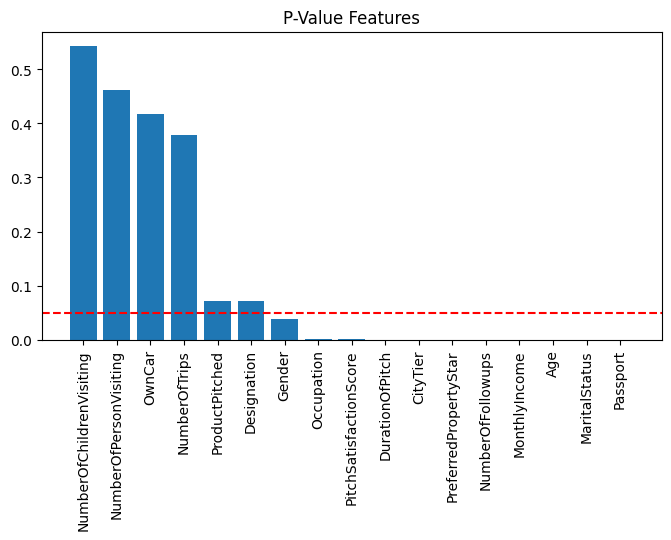

In [ ]:
f, x = plt.subplots(1,1, figsize=(8,4))

results.sort_values(by='p_stat', ascending=False, inplace=True)

plt.bar(results.features, results.p_stat, axes=x)
x.axhline(treshold, ls='--', c='r')
plt.xticks(rotation=90)
plt.title("P-Value Features")
plt.show();

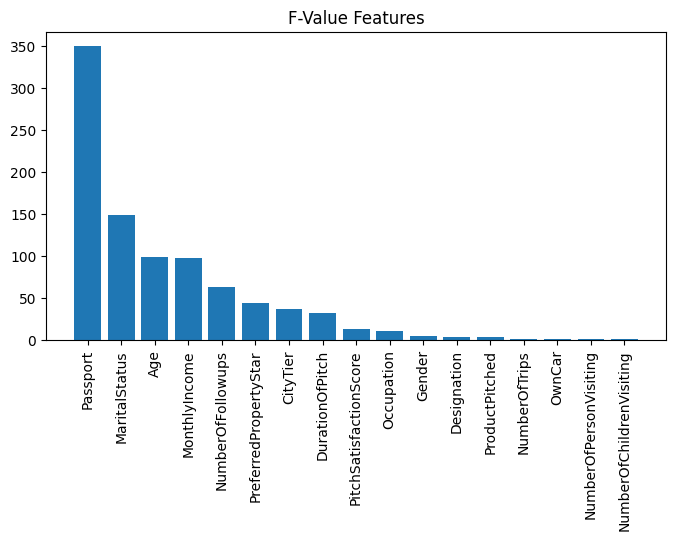

In [ ]:
f, x = plt.subplots(1,1, figsize=(8,4))

results.sort_values(by='f_stat', ascending=False, inplace=True)

plt.bar(results.features, results.f_stat, axes=x)

plt.title("F-Value Features")
plt.xticks(rotation=90)
plt.show();

### B. Feature Extraction

Tidak melakukan feature extraction karena feature-feature yang sudah diselection sudah cukup relevan dalam analisisnya.
Tambahan feature yang mungkin relevan untuk dataset diatas:
- Fitur Kategorikal Interaksi
- Fitur Skor Kesejahteraan Finansial
- Fitur Durasi Kontak dalam Jam
- Fitur Kategorikal Berdasarkan Status Pernikahan dan Jumlah Anak

### C. Rekomendasi 4 feature tambahan
1. Fitur Kategorikal Interaksi
       Contoh: Age_Category_TypeofContact
Fitur ini hasil interaksi antara kategori umur dan jenis kontak dengan mengelompokkan umur ke dalam kategori. Seperti "18-30", "31-45", "46-60", dan "60+" untuk melihat interaksi antara kelompok umur dan jenis kontak (misalnya, telepon vs. email) mempengaruhi keputusan untuk membeli produk.

2. Fitur Skor Kesejahteraan Finansial
       Contoh: IncomePerChild
Fitur ini dapat memberikan wawasan tentang kesejahteraan finansial relatif pelanggan yang mempengaruhi keputusan perjalanan atau pengeluaran.

3. Fitur Durasi Kontak dalam Jam
       Contoh: DurationOfPitchInHours
Fitur dengan mengubah DurationOfPitch dari menit ke jam dengan membaginya 60 (DurationOfPitch / 60) , tujuannya untuk melihat hubungan antara durasi pitch dan keputusan pembelian.

4. Fitur Kategorikal Berdasarkan Status Pernikahan dan Jumlah Anak
       Contoh: MaritalStatus_ChildrenInteraction
Fitur berdasarkan interaksi antara status pernikahan (MaritalStatus) dan jumlah anak yang dikunjungi (NumberOfChildrenVisiting). Fitur ini  berupa kombinasi status pernikahan dengan rentang jumlah anak, yang dapat memberikan informasi tambahan tentang bagaimana struktur keluarga mempengaruhi keputusan membeli produk.
